In [1]:
#importing necessities
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#uploding data 
data=pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#renaming genre to Gender
data.rename(columns={'Genre':'Gender'},inplace=True)

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#shape of data
data.shape

(200, 5)

In [6]:
#describing data
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
#finding data type
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
#finding null values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
data.drop(['CustomerID'],axis=1,inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

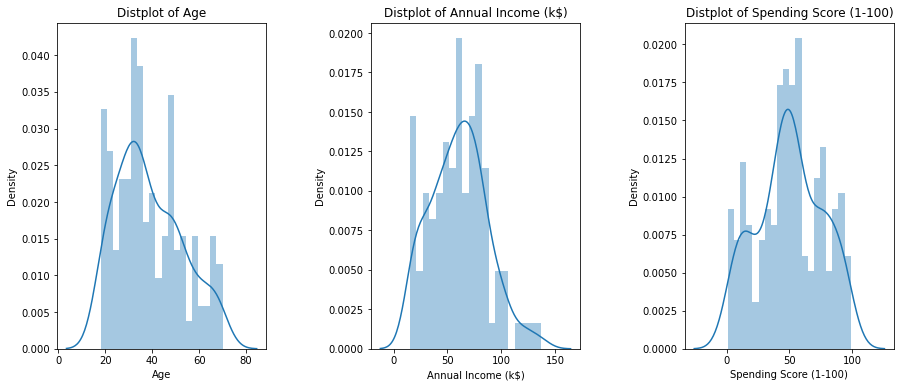

In [10]:
# visiual representaion
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(data[x],bins=20)
    plt.title("Distplot of {}".format(x))
plt.show()

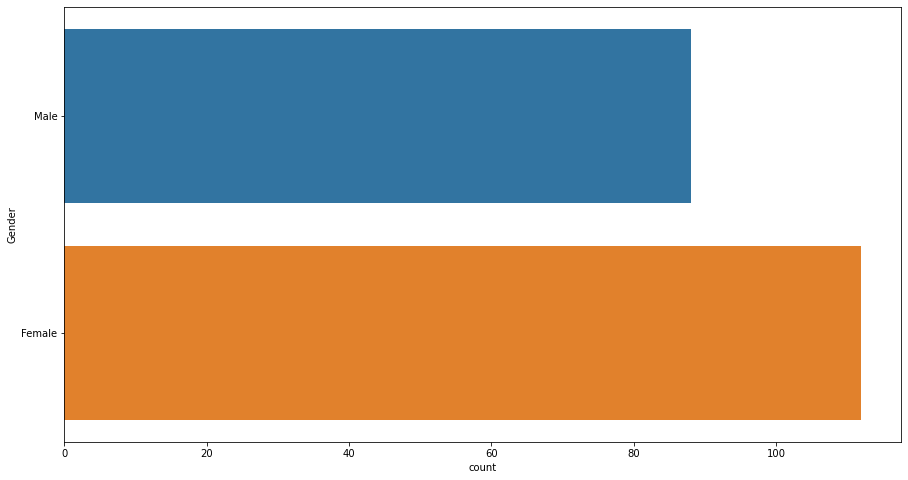

In [11]:
plt.figure(figsize=(15,8))
sns.countplot(y='Gender',data=data)
plt.show()

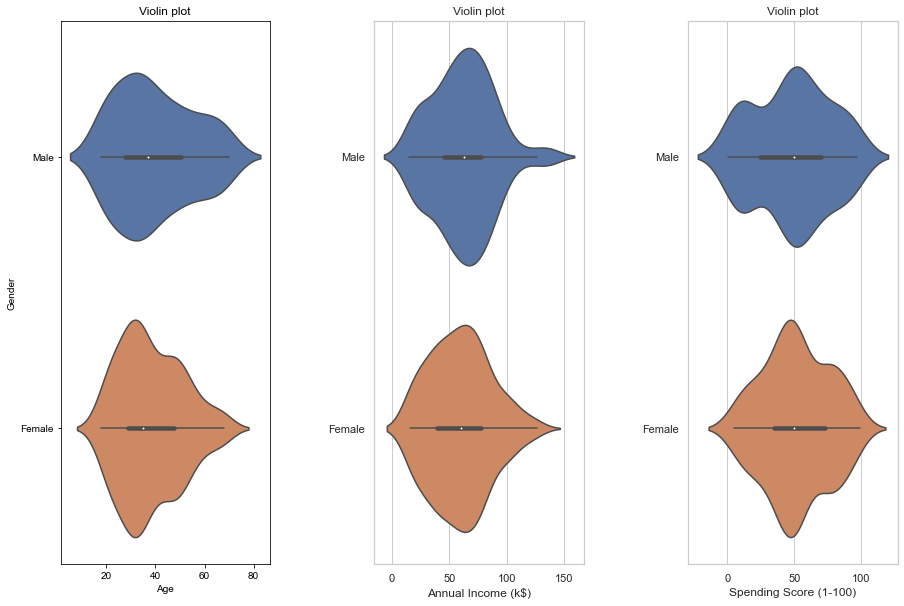

In [12]:
plt.figure(1,figsize=(15,10))
n=0
for cols in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n=n+1
    plt.subplot(1,3,n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y='Gender',data=data)
    plt.ylabel('Gender' if n==1 else ' ')
    plt.title('Violin plot')
plt.show()

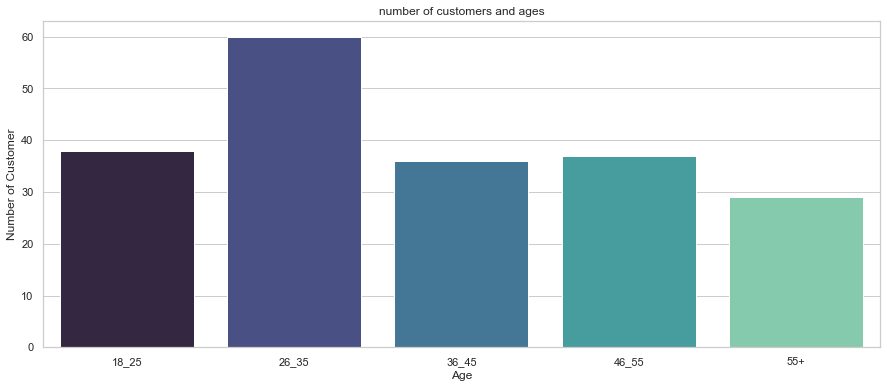

In [13]:
age_18_25=data.Age[(data.Age>=18)&(data.Age<=25)]
age_26_35=data.Age[(data.Age>=26)&(data.Age<=35)]
age_36_45=data.Age[(data.Age>=36)&(data.Age<=45)]
age_46_55=data.Age[(data.Age>=46)&(data.Age<=55)]
age_55above=data.Age[data.Age>=56]

agex=['18_25','26_35','36_45','46_55','55+']
agey=[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex,y=agey,palette='mako')
plt.title("number of customers and ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

In [14]:
#sns.replot(x='Annual Income(k$)',y='Spending Score (1-100)',data=data)

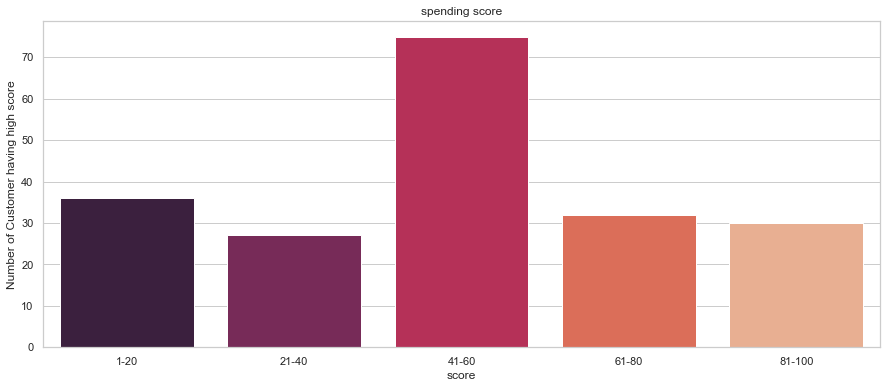

In [15]:
ss_1_20=data['Spending Score (1-100)'][(data['Spending Score (1-100)'] >= 1) & (data['Spending Score (1-100)'] <= 20)]
ss_21_40=data['Spending Score (1-100)'][(data['Spending Score (1-100)'] >= 21) & (data['Spending Score (1-100)'] <= 40)]
ss_41_60=data['Spending Score (1-100)'][(data['Spending Score (1-100)'] >= 41) & (data['Spending Score (1-100)'] <= 60)]
ss_61_80=data['Spending Score (1-100)'][(data['Spending Score (1-100)'] >= 61) & (data['Spending Score (1-100)'] <= 80)]
ss_81_100=data['Spending Score (1-100)'][(data['Spending Score (1-100)'] >= 81) & (data['Spending Score (1-100)'] <= 100)]

ssx=["1-20","21-40","41-60",'61-80',"81-100"]
ssy=[len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx,y=ssy,palette='rocket')
plt.title("spending score")
plt.xlabel("score")
plt.ylabel("Number of Customer having high score")
plt.show()

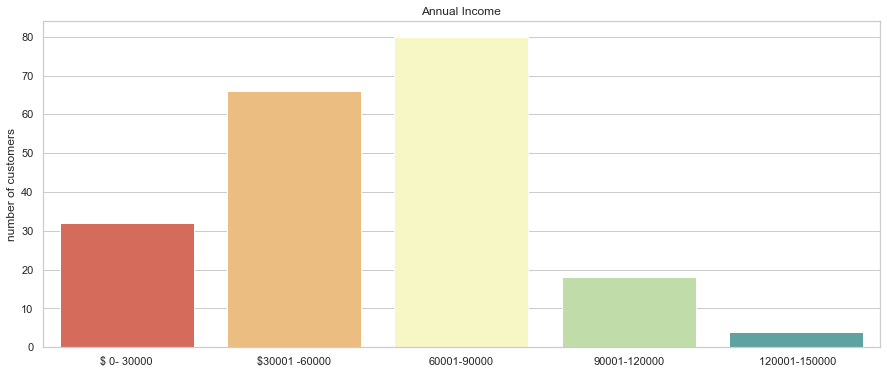

In [16]:
ai0_30=data['Annual Income (k$)'][(data['Annual Income (k$)'] >= 0 )& (data['Annual Income (k$)'] <= 30 )]
ai31_60=data['Annual Income (k$)'][(data['Annual Income (k$)'] >= 31) & (data['Annual Income (k$)'] <= 60 )]
ai61_90=data['Annual Income (k$)'][(data['Annual Income (k$)'] >= 61) & (data['Annual Income (k$)'] <= 90 )]
ai91_120=data['Annual Income (k$)'][(data['Annual Income (k$)'] >= 91) & (data['Annual Income (k$)'] <= 120 )]
ai121_150=data['Annual Income (k$)'][(data['Annual Income (k$)'] >=121) & (data['Annual Income (k$)'] <=150 )]
             
aix=["$ 0- 30000", "$30001 -60000" ,"60001-90000", "90001-120000" ," 120001-150000"]
aiy=[len(ai0_30.values),len(ai31_60.values),len(ai61_90.values),len(ai91_120.values),len(ai121_150.values)]
 
                                      
plt.figure(figsize=(15,6))
sns.barplot(x=aix ,y=aiy,palette="Spectral")
plt.xlabel=("income")
plt.ylabel("number of customers")
plt.title("Annual Income")
plt.show()
                                      

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


TypeError: 'str' object is not callable

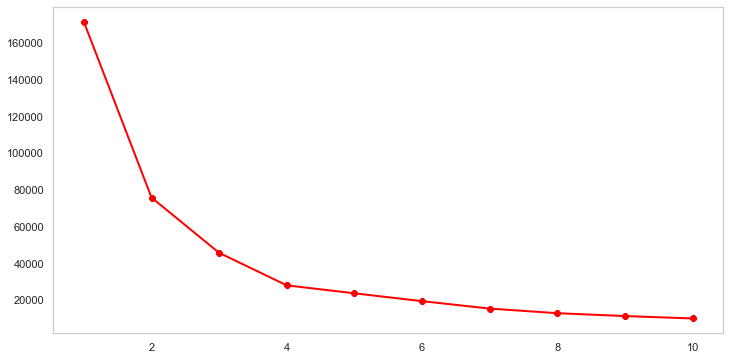

In [19]:
#clustering
x1=data.loc[:, ["Age", "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("values")
plt.ylabel("Wcss")
plt.show()

In [20]:
#initialize the class object
kmeans=KMeans(n_clusters=4)

#predict the labels of cluster
label=kmeans.fit_predict(x1)
print(label)

[1 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 1 1 3 2 1 2 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3
 2 3 2 0 2 0 1 3 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 1 1 2 1 2 0 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 1 2 3 2 0 2
 3 2 3 2 3 2 3 2 3 2 3 2 0 2 3 2 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3 2 3 2 3 2 1
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


In [21]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]]


TypeError: 'str' object is not callable

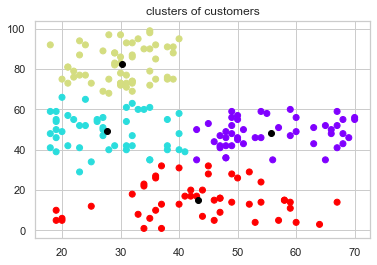

In [22]:
plt.scatter(x1[: ,0],x1[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="black")
plt.title("clusters of customers")
plt.xlabel("Age")
plt.ylabel("spending Score(1-100)")
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


TypeError: 'str' object is not callable

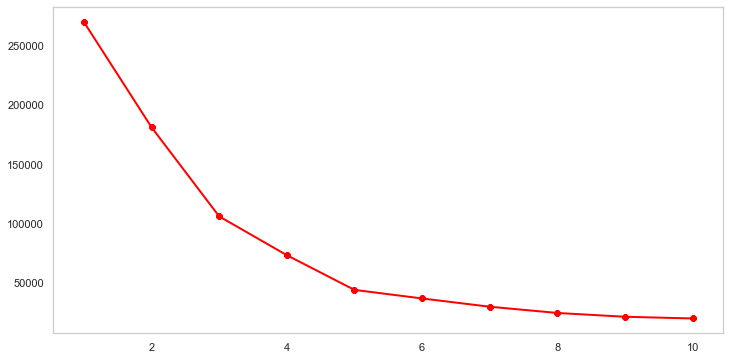

In [23]:
#clustering
x2=data.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("Kvalues")
plt.ylabel("Wcss")
plt.show()

In [24]:
#initialize the class object
kmeans=KMeans(n_clusters=5)

#predict the labels of cluster
label=kmeans.fit_predict(x2)
print(label)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 1 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 0 3 1 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3 1 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


In [25]:
print(kmeans.cluster_centers_)

[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]


TypeError: 'str' object is not callable

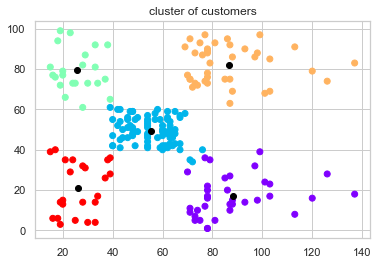

In [26]:
plt.scatter(x2[:,0],x1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title("cluster of customers")
plt.xlabel('Annual incomek$')
plt.ylabel("Spending score(1-100)")
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


TypeError: 'str' object is not callable

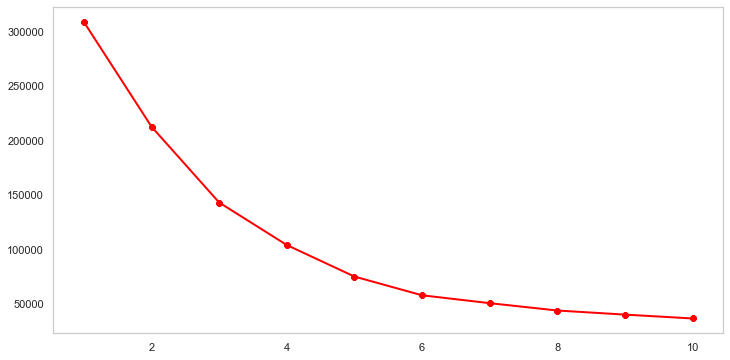

In [27]:
x3=data.iloc[:,1:]
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("Kvalues")
plt.ylabel("Wcss")
plt.show()

In [28]:
#initialize the class object
kmeans=KMeans(n_clusters=5)

#predict the labels of cluster
label=kmeans.fit_predict(x3)
print(label)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


In [29]:
print(kmeans.cluster_centers_)

[[45.2173913  26.30434783 20.91304348]
 [43.08860759 55.29113924 49.56962025]
 [32.69230769 86.53846154 82.12820513]
 [40.66666667 87.75       17.58333333]
 [25.52173913 26.30434783 78.56521739]]


In [30]:
clusters=kmeans.fit_predict(x3)
data["label"]=clusters

from mpl_toolkits.mplot3d import axes3d

fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection="3D")
ax.scatter(data.Age[data.label==0], data['Annual Income (k$)'][df.label == 0], data["Spending Score (1-100)"][data.label == 0],c="blue",s=60)
ax.scatter(data.Age[data.label==1], data['Annual Income (k$)'][df.label == 1], data["Spending Score (1-100)"][data.label == 1],c="red",s=60)
ax.scatter(data.Age[data.label==2], data['Annual Income (k$)'][df.label == 2], data["Spending Score (1-100)"][data.label == 2],c="green",s=60)
ax.scatter(data.Age[data.label==3], data['Annual Income (k$)'][df.label == 3], data["Spending Score (1-100)"][data.label == 3],c="orange",s=60)
ax.scatter(data.Age[data.label==4], data['Annual Income (k$)'][df.label == 4], data["Spending Score (1-100)"][data.label == 4],c="purple",s=60)

plt.xlabel("Age")
plt.ylabel("Annual imcome (k$)")
ax.set_zlabel("spending Score (1-100)")
plt.show()

ValueError: Unknown projection '3D'

<Figure size 1440x720 with 0 Axes>